# 모델링

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 파이썬 버전: Python 3.1.12

import pandas as pd
import numpy as np

# 그래프
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

# x축 간격
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter

import seaborn as sns



['NanumGothic']


In [ ]:
# lgb 모델
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

In [ ]:
# 릿지모델
from sklearn.linear_model import Ridge , LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

from sklearn.preprocessing import LabelBinarizer

from  scipy.sparse import hstack
import gc

## 초중고 데이터 불러오기

In [ ]:
# 초등학교
df20_el_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df20_el_final.csv')
df19_el_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df19_el_final.csv')
df18_el_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df18_el_final.csv')
df17_el_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df17_el_final.csv')

#중학교
df20_mi_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df20_mi_final.csv')
df19_mi_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df19_mi_final.csv')
df18_mi_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df18_mi_final.csv')
df17_mi_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df17_mi_final.csv')

# 고등학교
df20_hi_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df20_hi_final.csv')
df19_hi_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df19_hi_final.csv')
df18_hi_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df18_hi_final.csv')
df17_hi_final = pd.read_csv('/content/drive/Shareddrives/공공조달/df17_hi_final.csv')

In [ ]:
# 초등학교
df_el_final = pd.concat([df17_el_final,df18_el_final,df19_el_final,df20_el_final])

#중학교
df_mi_final = pd.concat([df17_mi_final,df18_mi_final,df19_mi_final,df20_mi_final])

# 고등학교
df_hi_final = pd.concat([df17_hi_final,df18_hi_final,df19_hi_final,df20_hi_final])


In [ ]:
print(df_el_final.shape)
df_el_final.info()
df_el_final.head()

(2400, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     2400 non-null   object
 1   count   2400 non-null   int64 
 2   rank    2400 non-null   int64 
 3   month   2400 non-null   int64 
 4   year    2400 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 112.5+ KB


,tag,count,rank,month,year
0,공고,333,1,1,2017
1,구매,315,2,1,2017
2,견적,270,3,1,2017
3,제출,256,4,1,2017
4,수의,248,5,1,2017


In [ ]:
print(df_mi_final.shape)
df_mi_final.info()
df_mi_final.head()

(2075, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 523
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     2075 non-null   object
 1   count   2075 non-null   int64 
 2   rank    2075 non-null   int64 
 3   month   2075 non-null   int64 
 4   year    2075 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 97.3+ KB


,tag,count,rank,month,year
0,구매,162,1,1,2017
1,중학교,137,2,1,2017
2,공고,126,3,1,2017
3,학년,96,4,1,2017
4,입찰,96,5,1,2017


In [ ]:
print(df_hi_final.shape)
df_hi_final.info()
df_hi_final.head()

(2032, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 512
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     2032 non-null   object
 1   count   2032 non-null   int64 
 2   rank    2032 non-null   int64 
 3   month   2032 non-null   int64 
 4   year    2032 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 95.2+ KB


,tag,count,rank,month,year
0,구매,346,1,1,2017
1,공고,284,2,1,2017
2,자재,225,3,1,2017
3,견적,199,4,1,2017
4,제출,194,5,1,2017


## 데이터 전처리

In [ ]:
df_el_final['count'] = df_el_final['count'].astype('float')
df_mi_final['count'] = df_mi_final['count'].astype('float')
df_hi_final['count'] = df_hi_final['count'].astype('float')

df_el_final['tag'] = df_el_final['tag'].astype('category')
df_mi_final['tag'] = df_mi_final['tag'].astype('category')
df_hi_final['tag'] = df_hi_final['tag'].astype('category')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


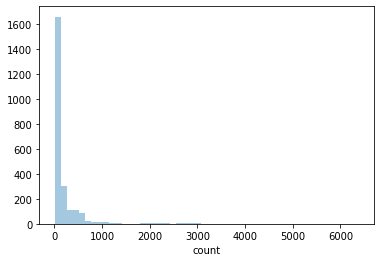

In [ ]:
y_train_df = df_el_final['count']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


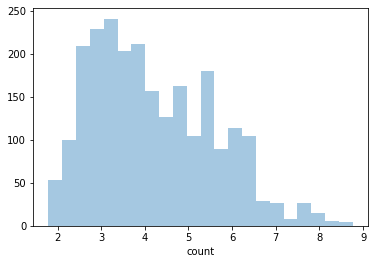

In [ ]:
y_train_df = np.log1p(y_train_df) # 로그변환
sns.distplot(y_train_df,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


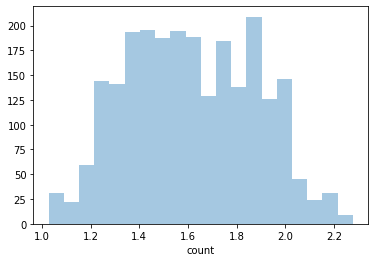

In [ ]:
y_train_df2 = np.log1p(y_train_df) # 로그변환 2번 
sns.distplot(y_train_df2,kde=False) #  정규분포에 가장 가깝다.

In [ ]:
# count 변수 정규화
df_el_final['count_log'] = np.log1p(np.log1p(df_el_final['count']))

df_mi_final['count_log'] = np.log1p(np.log1p(df_mi_final['count'])) 

df_hi_final['count_log'] = np.log1p(np.log1p(df_hi_final['count']))

In [ ]:
df_el_final.head()

,tag,count,rank,month,year,count_log
0,공고,333.0,1,1,2017,1.918560
1,구매,315.0,2,1,2017,1.910393
2,견적,270.0,3,1,2017,1.887391
3,제출,256.0,4,1,2017,1.879324
4,수의,248.0,5,1,2017,1.874484


## 초등학교

### lightgbm 모델

In [ ]:
# train 데이터와 test 데이터로 나누기
raw_x = df_el_final[['tag','rank','month','year']]
raw_y = df_el_final[['count_log']]
train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.3, random_state=42)
# lightgbm 데이터셋으로 변환
train_ds = lgb.Dataset(train_x, label = train_y)
test_ds = lgb.Dataset(test_x, label = test_y)

In [ ]:
# 파라미터 세팅
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2021}

          
# lightlgb 모델만들기
LGB_el = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 0.0161453
[200]	valid_0's l2: 0.00557844
[300]	valid_0's l2: 0.00305559
[400]	valid_0's l2: 0.00213593
[500]	valid_0's l2: 0.00163612
[600]	valid_0's l2: 0.00137906
[700]	valid_0's l2: 0.00115523
[800]	valid_0's l2: 0.000985792
[900]	valid_0's l2: 0.000901596
[1000]	valid_0's l2: 0.0008194
Did not meet early stopping. Best iteration is:
[999]	valid_0's l2: 0.000819337


In [ ]:
# test 데이터 예측 
predict_test_lgb = LGB_el.predict(test_x)

In [ ]:
# 에러 측정
mse_lgb = mean_squared_error(test_y, predict_test_lgb)
r2 = r2_score(test_y, predict_test_lgb)

print('Mean squared error: ', mse_lgb)
print('R2 score: ', r2)

Mean squared error:  0.0008193372140984096
R2 score:  0.9882977738027534


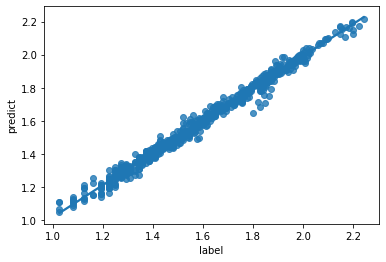

In [ ]:
# fit결과 확인
final_result_lgb = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test_lgb)], axis = 1)
final_result_lgb.columns = ['label','predict']

sns.regplot(x = 'label', y = 'predict', data = final_result_lgb)

### 릿지회귀 모델

In [ ]:
# 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_tag= LabelBinarizer(sparse_output=True)
X_tag = lb_tag.fit_transform(df_el_final['tag'])

lb_rank= LabelBinarizer(sparse_output=True)
X_rank = lb_rank.fit_transform(df_el_final['rank'])

lb_month= LabelBinarizer(sparse_output=True)
X_month = lb_month.fit_transform(df_el_final['month'])

lb_year= LabelBinarizer(sparse_output=True)
X_year = lb_year.fit_transform(df_el_final['year'])

In [ ]:
# 적당한 알파값 찾기
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
  ridge = Ridge(alpha)

  matrix_list= (X_tag, X_rank, X_month)
  X= hstack(matrix_list).tocsr()    
  X_train, X_test, y_train, y_test=train_test_split(X, df_el_final['count_log'], test_size=0.2, random_state=156) 

  ridge.fit(X_train , y_train)
  train_score.append(ridge.score(X_train , y_train))
  test_score.append(ridge.score(X_test , y_test))
print(train_score)
print(test_score)


[0.9127742821062264, 0.9127736980278849, 0.9127185813277725, 0.9103222816403056, 0.8774491266726825, 0.5730487093744234]
[0.864377285124982, 0.8643996473043702, 0.8645748898076593, 0.8641165947772671, 0.8379734653734707, 0.5451780714913624]


<function matplotlib.pyplot.show>

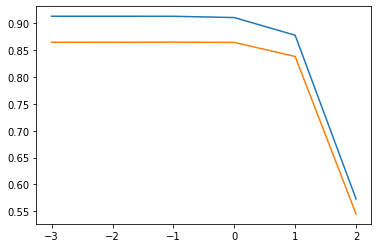

In [ ]:

plt.plot(np.log10(alpha_list),train_score) # alpha 값을 0.001부터 10배씩 늘렸기 때문에 log10를 취해준다.
plt.plot(np.log10(alpha_list),test_score)
plt.show

alpha 값이 0.001일때 가장 score가 높았다. 따라서 alpha=0.001인 모델을 만들었다.

In [ ]:
# 릿지 모델만들기
ridge_el = Ridge(alpha=0.001)

matrix_list= (X_tag, X_rank, X_month, X_year)
X= hstack(matrix_list).tocsr()    
X_train, X_test, y_train, y_test=train_test_split(X, df_el_final['count_log'], test_size=0.2, random_state=156) 

ridge_el.fit(X_train , y_train)

Ridge(alpha=0.001)

In [ ]:
# test 데이터 예측하기
predict_test_ridge = ridge_el.predict(X_test)

In [ ]:
# 에러 측정
mse_ridge = mean_squared_error(y_test, predict_test_ridge) 
score_ridge = ridge_el.score(X_test , y_test)

print('Mean squared error: {:,2f}',mse_ridge)
print('테스트 세트 점수: {:,2f}',score_ridge)

Mean squared error: {:,2f} 0.006789902023264504
테스트 세트 점수: {:,2f} 0.9002856671428567


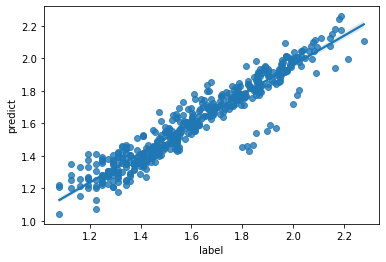

In [ ]:
# fit결과 확인
final_result_ridge = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test_ridge)], axis = 1)
final_result_ridge.columns = ['label','predict']

sns.regplot(x = 'label', y = 'predict', data = final_result_ridge)

*   lightGBM 모델의 R2 score는 0.99로 데이터의 99%를 설명해 준다.
*   릿지 회귀 모델의 score는 0.94로 데이터의 94%를 설명해 준다.

따라서 릿지 회귀모델보다 lightGBM이 단어의 언급 수를 예측하는 데에 더 적절한 모델이다.


## 중학교

### lightgbm 모델

In [ ]:
# train 데이터와 test 데이터로 나누기
raw_x = df_mi_final[['tag','rank','month','year']]
raw_y = df_mi_final[['count_log']]
train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.3, random_state=42)
# lightgbm 데이터셋으로 변환
train_ds = lgb.Dataset(train_x, label = train_y)
test_ds = lgb.Dataset(test_x, label = test_y)

In [ ]:
# 파라미터 세팅
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2021}

          
# lightlgb 모델만들기
LGB_mi = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 0.0152032
[200]	valid_0's l2: 0.00704884
[300]	valid_0's l2: 0.00486596
[400]	valid_0's l2: 0.00379948
[500]	valid_0's l2: 0.00281966
[600]	valid_0's l2: 0.0022859
[700]	valid_0's l2: 0.00182809
[800]	valid_0's l2: 0.00156553
[900]	valid_0's l2: 0.00140787
[1000]	valid_0's l2: 0.00124446
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 0.00124446


In [ ]:
# test 데이터 예측 
predict_test_lgb = LGB_mi.predict(test_x)

In [ ]:
# 에러 측정
mse_lgb = mean_squared_error(test_y, predict_test_lgb)
r2 = r2_score(test_y, predict_test_lgb)

print('Mean squared error: ', mse_lgb)
print('R2 score: ', r2)

Mean squared error:  0.0012444609875799579
R2 score:  0.9772514632303368


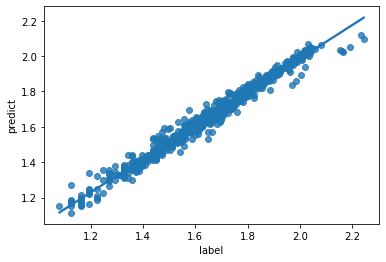

In [ ]:
# fit결과 확인
final_result_lgb = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test_lgb)], axis = 1)
final_result_lgb.columns = ['label','predict']

sns.regplot(x = 'label', y = 'predict', data = final_result_lgb)

### 릿지회귀 모델

In [ ]:
# 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_tag= LabelBinarizer(sparse_output=True)
X_tag = lb_tag.fit_transform(df_mi_final['tag'])

lb_rank= LabelBinarizer(sparse_output=True)
X_rank = lb_rank.fit_transform(df_mi_final['rank'])

lb_month= LabelBinarizer(sparse_output=True)
X_month = lb_month.fit_transform(df_mi_final['month'])

lb_year= LabelBinarizer(sparse_output=True)
X_year = lb_year.fit_transform(df_mi_final['year'])

In [ ]:
# 적당한 알파값 찾기
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
  ridge = Ridge(alpha)

  matrix_list= (X_tag, X_rank, X_month)
  X= hstack(matrix_list).tocsr()    
  X_train, X_test, y_train, y_test=train_test_split(X, df_mi_final['count_log'], test_size=0.2, random_state=156) 

  ridge.fit(X_train , y_train)
  train_score.append(ridge.score(X_train , y_train))
  test_score.append(ridge.score(X_test , y_test))
print(train_score)
print(test_score)


[0.8483494811616487, 0.848349003535973, 0.8483055612418957, 0.8460401549315177, 0.8112158680417552, 0.5182432422000753]
[0.8330802628724524, 0.8330945067290222, 0.8331887134511803, 0.831817774700204, 0.8018974518727812, 0.5216901551390348]


<function matplotlib.pyplot.show>

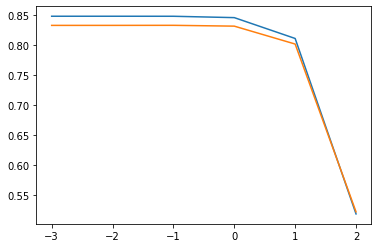

In [ ]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.show

alpha 값이 0.001일때 가장 score가 높았다. 따라서 alpha=0.001인 모델을 만들었다.

In [ ]:
# 릿지 모델만들기
ridge_mi = Ridge(alpha=0.001)

matrix_list= (X_tag, X_rank, X_month, X_year)
X= hstack(matrix_list).tocsr()    
X_train, X_test, y_train, y_test=train_test_split(X, df_mi_final['count_log'], test_size=0.2, random_state=156) 

ridge_mi.fit(X_train , y_train)

Ridge(alpha=0.001)

In [ ]:
# test 데이터 예측하기
predict_test_ridge = ridge_mi.predict(X_test)

In [ ]:
# 에러 측정
mse_ridge = mean_squared_error(y_test, predict_test_ridge) 
score_ridge = ridge_mi.score(X_test , y_test)

print('Mean squared error: {:,2f}',mse_ridge)
print('테스트 세트 점수: {:,2f}',score_ridge)

Mean squared error: {:,2f} 0.007136880170513964
테스트 세트 점수: {:,2f} 0.8539740327516641


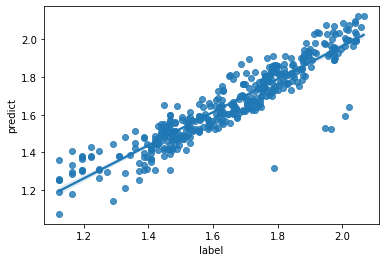

In [ ]:
# fit결과 확인
final_result_ridge = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test_ridge)], axis = 1)
final_result_ridge.columns = ['label','predict']

sns.regplot(x = 'label', y = 'predict', data = final_result_ridge)

*   lightGBM 모델의 R2 score는 0.99로 데이터의 99%를 설명해 준다.
*   릿지 회귀 모델의 score는 0.94로 데이터의 94%를 설명해 준다.

따라서 릿지 회귀모델보다 lightGBM이 단어의 언급 수를 예측하는 데에 더 적절한 모델이다.


## 고등학교

### lightgbm 모델

In [ ]:
# train 데이터와 test 데이터로 나누기
raw_x = df_hi_final[['tag','rank','month','year']]
raw_y = df_hi_final[['count_log']]
train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.3, random_state=42)
# lightgbm 데이터셋으로 변환
train_ds = lgb.Dataset(train_x, label = train_y)
test_ds = lgb.Dataset(test_x, label = test_y)

In [ ]:
# 파라미터 세팅
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2021}

          
# lightlgb 모델만들기
LGB_hi = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 0.00999342
[200]	valid_0's l2: 0.00475032
[300]	valid_0's l2: 0.00340281
[400]	valid_0's l2: 0.00281362
[500]	valid_0's l2: 0.00219308
[600]	valid_0's l2: 0.00183786
[700]	valid_0's l2: 0.00157916
[800]	valid_0's l2: 0.00133298
[900]	valid_0's l2: 0.00119261
[1000]	valid_0's l2: 0.00105692
Did not meet early stopping. Best iteration is:
[999]	valid_0's l2: 0.00105665


In [ ]:
# test 데이터 예측 
predict_test_lgb = LGB_hi.predict(test_x)

In [ ]:
# 에러 측정
mse_lgb = mean_squared_error(test_y, predict_test_lgb)
r2 = r2_score(test_y, predict_test_lgb)

print('Mean squared error: ', mse_lgb)
print('R2 score: ', r2)

Mean squared error:  0.0010566510062358042
R2 score:  0.9713898068652775


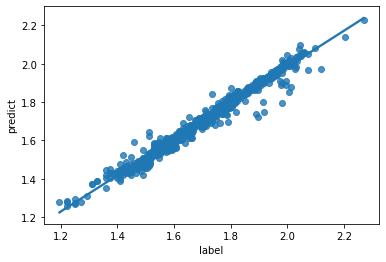

In [ ]:
# fit결과 확인
final_result_lgb = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test_lgb)], axis = 1)
final_result_lgb.columns = ['label','predict']

sns.regplot(x = 'label', y = 'predict', data = final_result_lgb)

### 릿지회귀 모델

In [ ]:
# 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_tag= LabelBinarizer(sparse_output=True)
X_tag = lb_tag.fit_transform(df_hi_final['tag'])

lb_rank= LabelBinarizer(sparse_output=True)
X_rank = lb_rank.fit_transform(df_hi_final['rank'])

lb_month= LabelBinarizer(sparse_output=True)
X_month = lb_month.fit_transform(df_hi_final['month'])

lb_year= LabelBinarizer(sparse_output=True)
X_year = lb_year.fit_transform(df_hi_final['year'])

In [ ]:
# 적당한 알파값 찾기
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
  ridge = Ridge(alpha)

  matrix_list= (X_tag, X_rank, X_month)
  X= hstack(matrix_list).tocsr()    
  X_train, X_test, y_train, y_test=train_test_split(X, df_hi_final['count_log'], test_size=0.2, random_state=156) 

  ridge.fit(X_train , y_train)
  train_score.append(ridge.score(X_train , y_train))
  test_score.append(ridge.score(X_test , y_test))
print(train_score)
print(test_score)


[0.8483006319830295, 0.8482998513822666, 0.8482272395402799, 0.8458092261189538, 0.8115957636427106, 0.5153567199589514]
[0.8380998883230583, 0.8381571085476083, 0.8386004697591594, 0.8389601998228636, 0.8086839898229568, 0.5000081503556655]


<function matplotlib.pyplot.show>

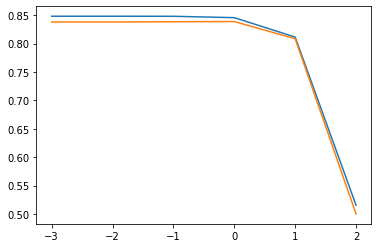

In [ ]:

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.show

alpha 값이 0.001일때 가장 score가 높았다. 따라서 alpha=0.001인 모델을 만들었다.

In [ ]:
# 릿지 모델만들기
ridge_hi = Ridge(alpha=0.001)

matrix_list= (X_tag, X_rank, X_month, X_year)
X= hstack(matrix_list).tocsr()    
X_train, X_test, y_train, y_test=train_test_split(X, df_hi_final['count_log'], test_size=0.2, random_state=156) 

ridge_hi.fit(X_train , y_train)

Ridge(alpha=0.001)

In [ ]:
# test 데이터 예측하기
predict_test_ridge = ridge_hi.predict(X_test)

In [ ]:
# 에러 측정
mse_ridge = mean_squared_error(y_test, predict_test_ridge) 
score_ridge = ridge_hi.score(X_test , y_test)

print('Mean squared error: {:,2f}',mse_ridge)
print('테스트 세트 점수: {:,2f}',score_ridge)

Mean squared error: {:,2f} 0.004239001160908669
테스트 세트 점수: {:,2f} 0.8820034268566388


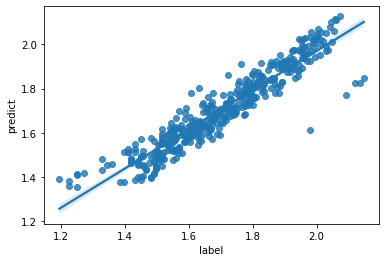

In [ ]:
# fit결과 확인
final_result_ridge = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test_ridge)], axis = 1)
final_result_ridge.columns = ['label','predict']

sns.regplot(x = 'label', y = 'predict', data = final_result_ridge)



*   lightGBM 모델의 R2 score는 0.99로 데이터의 98%를 설명해 준다.
*   릿지 회귀 모델의 score는 0.94로 데이터의 94%를 설명해 준다.

따라서 릿지 회귀모델보다 lightGBM이 단어의 언급 수를 예측하는 데에 더 적절한 모델이다.



## 2021 데이터로 앞에 모델이 데이터를 잘 예측하는지 확인

### 2021년도 데이터 가져오기

In [ ]:
import warnings #경고 미출력
warnings.filterwarnings('ignore')
from collections import Counter 

# 데이터 샘플링
import random
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

# validation
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 


# 한글 
!pip install konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma
from collections import Counter 

#한글깨짐 현상 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

     |████████████████████████████████| 19.4 MB 4.5 MB/s 
     |████████████████████████████████| 448 kB 46.8 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize

In [ ]:
# 2021년도 데이터 가져오기
df21_1 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년01월.csv', encoding='UTF-8')
df21_1['year'] = '2021'
df21_1['month'] = 1
df21_2 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년02월.csv', encoding='UTF-8')
df21_2['year'] = '2021'
df21_2['month'] = 2
df21_3 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년03월.csv', encoding='UTF-8')
df21_3['year'] = '2021'
df21_3['month'] = 3
df21_4 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년04월.csv', encoding='UTF-8')
df21_4['year'] = '2021'
df21_4['month'] = 4
df21_5 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년05월.csv', encoding='UTF-8')
df21_5['year'] = '2021'
df21_5['month'] = 5
df21_6 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년06월.csv', encoding='UTF-8')
df21_6['year'] = '2021'
df21_6['month'] = 6
df21_7 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년07월.csv', encoding='UTF-8')
df21_7['year'] = '2021'
df21_7['month'] = 7
df21_8 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년08월.csv', encoding='UTF-8')
df21_8['year'] = '2021'
df21_8['month'] = 8
df21_9 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년09월.csv', encoding='UTF-8')
df21_9['year'] = '2021'
df21_9['month'] = 9
df21_10 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년10월.csv', encoding='UTF-8')
df21_10['year'] = '2021'
df21_10['month'] = 10
df21_11 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년11월.csv', encoding='UTF-8')
df21_11['year'] = '2021'
df21_11['month'] = 11
df21_12 = pd.read_csv('/content/drive/Shareddrives/공공조달/통합 입찰공고 내역_2021년12월.csv', encoding='UTF-8')
df21_12['year'] = '2021'
df21_12['month'] = 12

df21_all = pd.concat([df21_1,df21_2,df21_3,df21_4,df21_5,df21_6,df21_7,df21_8,df21_9,df21_10,df21_11,df21_12])

In [ ]:
df21_all=df21_all[['업무구분','공고명','공고기관명','수요기관명','추정가격(배정금액)','month']]

In [ ]:
df21_all['추정가격(배정금액)'] = df21_all['추정가격(배정금액)'].fillna(0)

In [ ]:
df21_all.head()

,업무구분,공고명,공고기관명,수요기관명,추정가격(배정금액),month
0,용역,LNG저장탱크 콘크리트 구조물 외관조사 용역,한국가스안전공사,한국가스안전공사,327272727,1
1,용역,2021년 함양군 지적재조사사업 측량·조사 용역 사업수행자 선정 공고,경상남도 함양군,경상남도 함양군,92320000,1
2,물품,2021년 영양플러스사업 (보충식품) 소액수의 단가 입찰,전라남도 영암군 보건소,전라남도 영암군 보건소,63636363,1
3,공사,울돌목 판옥선 내부 방수공사,전라남도 해남군,전라남도 해남군,38181818,1
4,공사,해남군 송지면 사구리 소규모 하천 정비공사,전라남도 해남군,전라남도 해남군,23636363,1


In [ ]:
df21 = df21_all[df21_all['업무구분']=='물품'] #물품만 뽑기

In [ ]:
df21.count() # 총 530353개의 행이 존재

업무구분          164937
공고명           164937
공고기관명         164937
수요기관명         164937
추정가격(배정금액)    164937
month         164937
dtype: int64

In [ ]:

# 21년도 데이터를 초중고로 나눠 다시 저장하기
df21_el = df21[df21['수요기관명'].str.contains('초등학교')]
df21_mi = df21[df21['수요기관명'].str.contains('중학교')]
df21_hi = df21[df21['수요기관명'].str.contains('고등학교')]

#### 2021년도 초등학교




In [ ]:
df21_el.head()

,업무구분,공고명,공고기관명,수요기관명,추정가격(배정금액),month
68,물품,2021학년도 삼성초등학교 급식용 우유 구입 수의견적 제출 공고,제주특별자치도교육청 제주시교육지원청 삼성초등학교,제주특별자치도교육청 제주시교육지원청 삼성초등학교,67255909,1
115,물품,2021학년도 서울서원초등학교 급식 우유 구매[단가] 전자입찰 공고[긴급],서울특별시강남교육청 서울서원초등학교,서울특별시강남교육청 서울서원초등학교,430,1
263,물품,2021학년 샛별초 학교급식용 우유 구매 소액수의 견적 공고,충청북도교육청 충청북도청주교육지원청 샛별초등학교,충청북도교육청 충청북도청주교육지원청 샛별초등학교,390,1
267,물품,2021학년도 서울역삼초등학교 급식용우유 소액수의 견적 제출 공고,서울특별시강남교육청 서울역삼초등학교,서울특별시강남교육청 서울역삼초등학교,25385636,1
358,물품,2021학년도 신제주초등학교 급식용 액화석유가스(LPG)공급단가 견적 공고,제주특별자치도교육청 제주시교육청 신제주초등학교,제주특별자치도교육청 제주시교육청 신제주초등학교,18157272,1


In [ ]:
df21_el

,업무구분,공고명,공고기관명,수요기관명,추정가격(배정금액),month
68,물품,2021학년도 삼성초등학교 급식용 우유 구입 수의견적 제출 공고,제주특별자치도교육청 제주시교육지원청 삼성초등학교,제주특별자치도교육청 제주시교육지원청 삼성초등학교,67255909,1
115,물품,2021학년도 서울서원초등학교 급식 우유 구매[단가] 전자입찰 공고[긴급],서울특별시강남교육청 서울서원초등학교,서울특별시강남교육청 서울서원초등학교,430,1
263,물품,2021학년 샛별초 학교급식용 우유 구매 소액수의 견적 공고,충청북도교육청 충청북도청주교육지원청 샛별초등학교,충청북도교육청 충청북도청주교육지원청 샛별초등학교,390,1
267,물품,2021학년도 서울역삼초등학교 급식용우유 소액수의 견적 제출 공고,서울특별시강남교육청 서울역삼초등학교,서울특별시강남교육청 서울역삼초등학교,25385636,1
358,물품,2021학년도 신제주초등학교 급식용 액화석유가스(LPG)공급단가 견적 공고,제주특별자치도교육청 제주시교육청 신제주초등학교,제주특별자치도교육청 제주시교육청 신제주초등학교,18157272,1
...,...,...,...,...,...,...
49428,물품,2022학년도 석곶초등학교 돌봄교실 및 병설유치원 방과후과정 간식 납품업체 선정,경기도교육청 경기도파주교육지원청 석곶초등학교,경기도교육청 경기도파주교육지원청 석곶초등학교,49170909,12
49462,물품,서울쌍문초등학교 디지털미디어센터 구축 제안서 제출 안내,서울특별시북부교육청 서울쌍문초등학교,서울특별시북부교육청 서울쌍문초등학교,72727272,12
49480,물품,건원초등학교 노후 방송장비 교체 사업 제안서 제출 공고,경기도교육청 경기도구리남양주교육지원청 건원초등학교,경기도교육청 경기도구리남양주교육지원청 건원초등학교,0,12
49697,물품,서연초등학교 어린이놀이기구 구매 및 설치 제안서 제출 안내,경기도교육청 경기도화성오산교육지원청 서연초등학교,경기도교육청 경기도화성오산교육지원청 서연초등학교,18181818,12


In [ ]:
# 데이터 저장할 list 만들기
df21_01_val = []
df21_02_val = []
df21_03_val = []
df21_04_val = []
df21_05_val = []
df21_06_val = []
df21_07_val = []
df21_08_val = []
df21_09_val = []
df21_10_val = []
df21_11_val = []
df21_12_val = []
df21_13_val = [] 

df21_el_val_list = [df21_01_val, df21_02_val, df21_03_val, df21_04_val, df21_05_val, df21_06_val, 
                    df21_07_val, df21_08_val, df21_09_val, df21_10_val, df21_11_val, df21_12_val, df21_13_val]


test_string21_01 = []
test_string21_02 = []
test_string21_03 = []
test_string21_04 = []
test_string21_05 = []
test_string21_06 = []
test_string21_07 = []
test_string21_08 = []
test_string21_09 = []
test_string21_10 = []
test_string21_11 = []
test_string21_12 = []
test_string21_13 = []

test_string21_list = [test_string21_01, test_string21_02, test_string21_03, test_string21_04, test_string21_05, test_string21_06, 
                      test_string21_07, test_string21_08, test_string21_09, test_string21_10, test_string21_11, test_string21_12, test_string21_13]


nouns21_01 = []
nouns21_02 = []
nouns21_03 = []
nouns21_03 = []
nouns21_04 = []
nouns21_05 = []
nouns21_06 = []
nouns21_07 = []
nouns21_08 = []
nouns21_09 = []
nouns21_10 = []
nouns21_11 = []
nouns21_12 = []
nouns21_13 = []

nouns21_list = [nouns21_01, nouns21_02, nouns21_03, nouns21_04, nouns21_05, nouns21_06, 
                nouns21_07, nouns21_08, nouns21_09, nouns21_10, nouns21_11, nouns21_12,nouns21_13]

tag_count21_01 = []
tag_count21_02 = []
tag_count21_03 = []
tag_count21_04 = []
tag_count21_05 = []
tag_count21_06 = []
tag_count21_07 = []
tag_count21_08 = []
tag_count21_09 = []
tag_count21_10 = []
tag_count21_11 = []
tag_count21_12 = []
tag_count21_13 = []

tag_count21_list = [tag_count21_01, tag_count21_02, tag_count21_03, tag_count21_04, tag_count21_05, tag_count21_06, 
                    tag_count21_07, tag_count21_08, tag_count21_09, tag_count21_10, tag_count21_11, tag_count21_12, tag_count21_13]


In [ ]:
 # 결과를 저장할 데이터 프레임 만들기
col_names = ['tag','count' ,'rank', 'month' ,'year']
df21_el_final = pd.DataFrame(columns=col_names)
df21_el_final # 데이터 프레임 col 확인
okt = Okt()
kkma = Kkma()

In [ ]:
for i in range(1,13):
  # 단어만 뽑기
  okt = Okt()
  kkma = Kkma()

  df21_el_val_list[i] = df21_el['공고명'][df21_el['month']==i].values
  df21_el_val_list[i]

  test_string21_list[i] = "".join(df21_el_val_list[i])

  nouns21_list[i]= okt.nouns(test_string21_list[i])


  # 단어 수 세기
  count = Counter( nouns21_list[i]) 
  tag_count = [] 
  tags = [] 
  cnt = 1
  for n, c in count.most_common(100): 
    dics = {'tag': n, 'count': c, 'rank':cnt, 'month': i , 'year' : '2021' } # 뒤에 작성 완료
    cnt += 1
    if len(dics['tag']) >= 2 and len(tags) <= 49: 
      tag_count.append(dics) 
      tags.append(dics['tag'])
  tag_count21_list[i]= tag_count # tag_count21_list에 있는 리스트에 결과값 저장
  
  df21_el_final = df21_el_final.append(tag_count21_list[i]) # 데이터 프레임에 결과값 저장

#### 2021년도 중학교




In [ ]:
df21_mi.head()

,업무구분,공고명,공고기관명,수요기관명,추정가격(배정금액),month
546,물품,2021학년도 천성중학교 우유 공급업체 선정 입찰 공고,충청남도천안교육청 천성중학교,충청남도천안교육청 천성중학교,390,1
618,물품,2021년 2월 학교급식용 식재료(육류) 구매 소액수의 전자견적 제출 안내 공고,대구광역시교육청 대구광역시서부교육지원청 대구체육중학교,대구광역시교육청 대구광역시서부교육지원청 대구체육중학교,8834590,1
620,물품,2021학년도 정산중학교 급식용 우유 공동구매 소액수의 견적 제출 공고,충청남도청양교육청 정산중학교,충청남도청양교육청 정산중학교,390,1
663,물품,"2021학년도 정읍여자중학교 교복(동복,하복,생활복) 학교주관 구매 입찰 공고",전라북도정읍교육청 정읍여자중학교,전라북도정읍교육청 정읍여자중학교,290909,1
684,물품,2021학년 금오중학교 신입생 체육복(동하복) 학교주관 구매,경상남도교육청 경상남도양산교육지원청 금오중학교,경상남도교육청 경상남도양산교육지원청 금오중학교,63636,1


In [ ]:
df21_mi

,업무구분,공고명,공고기관명,수요기관명,추정가격(배정금액),month
546,물품,2021학년도 천성중학교 우유 공급업체 선정 입찰 공고,충청남도천안교육청 천성중학교,충청남도천안교육청 천성중학교,390,1
618,물품,2021년 2월 학교급식용 식재료(육류) 구매 소액수의 전자견적 제출 안내 공고,대구광역시교육청 대구광역시서부교육지원청 대구체육중학교,대구광역시교육청 대구광역시서부교육지원청 대구체육중학교,8834590,1
620,물품,2021학년도 정산중학교 급식용 우유 공동구매 소액수의 견적 제출 공고,충청남도청양교육청 정산중학교,충청남도청양교육청 정산중학교,390,1
663,물품,"2021학년도 정읍여자중학교 교복(동복,하복,생활복) 학교주관 구매 입찰 공고",전라북도정읍교육청 정읍여자중학교,전라북도정읍교육청 정읍여자중학교,290909,1
684,물품,2021학년 금오중학교 신입생 체육복(동하복) 학교주관 구매,경상남도교육청 경상남도양산교육지원청 금오중학교,경상남도교육청 경상남도양산교육지원청 금오중학교,63636,1
...,...,...,...,...,...,...
49683,물품,2022학년도 인창중학교 신입생 교복(동복생활복) 학교주관구매,경기도교육청 경기도구리남양주교육지원청 인창중학교,경기도교육청 경기도구리남양주교육지원청 인창중학교,51818,12
49769,물품,2022학년도 화천중학교 교복(하복·동복) 학교주관구매 입찰 공고,강원도화천교육청 화천중학교,강원도화천교육청 화천중학교,271145,12
49915,물품,2022학년도 인동중학교 학교주관교복(동복·생활하복)구매 2단계입찰(규격·가격 분리...,경상북도교육청 경상북도구미교육지원청 인동중학교,경상북도교육청 경상북도구미교육지원청 인동중학교,278181,12
49975,물품,음악실 그랜드 피아노구입,충청남도천안교육청 천안서여자중학교,충청남도천안교육청 천안서여자중학교,28338772,12


In [ ]:
# 데이터 저장할 list 만들기
df21_01_val = []
df21_02_val = []
df21_03_val = []
df21_04_val = []
df21_05_val = []
df21_06_val = []
df21_07_val = []
df21_08_val = []
df21_09_val = []
df21_10_val = []
df21_11_val = []
df21_12_val = []
df21_13_val = [] 

df21_mi_val_list = [df21_01_val, df21_02_val, df21_03_val, df21_04_val, df21_05_val, df21_06_val, 
                    df21_07_val, df21_08_val, df21_09_val, df21_10_val, df21_11_val, df21_12_val, df21_13_val]


test_string21_01 = []
test_string21_02 = []
test_string21_03 = []
test_string21_04 = []
test_string21_05 = []
test_string21_06 = []
test_string21_07 = []
test_string21_08 = []
test_string21_09 = []
test_string21_10 = []
test_string21_11 = []
test_string21_12 = []
test_string21_13 = []

test_string21_list = [test_string21_01, test_string21_02, test_string21_03, test_string21_04, test_string21_05, test_string21_06, 
                      test_string21_07, test_string21_08, test_string21_09, test_string21_10, test_string21_11, test_string21_12, test_string21_13]


nouns21_01 = []
nouns21_02 = []
nouns21_03 = []
nouns21_03 = []
nouns21_04 = []
nouns21_05 = []
nouns21_06 = []
nouns21_07 = []
nouns21_08 = []
nouns21_09 = []
nouns21_10 = []
nouns21_11 = []
nouns21_12 = []
nouns21_13 = []

nouns21_list = [nouns21_01, nouns21_02, nouns21_03, nouns21_04, nouns21_05, nouns21_06, 
                nouns21_07, nouns21_08, nouns21_09, nouns21_10, nouns21_11, nouns21_12,nouns21_13]

tag_count21_01 = []
tag_count21_02 = []
tag_count21_03 = []
tag_count21_04 = []
tag_count21_05 = []
tag_count21_06 = []
tag_count21_07 = []
tag_count21_08 = []
tag_count21_09 = []
tag_count21_10 = []
tag_count21_11 = []
tag_count21_12 = []
tag_count21_13 = []

tag_count21_list = [tag_count21_01, tag_count21_02, tag_count21_03, tag_count21_04, tag_count21_05, tag_count21_06, 
                    tag_count21_07, tag_count21_08, tag_count21_09, tag_count21_10, tag_count21_11, tag_count21_12, tag_count21_13]


In [ ]:
 # 결과를 저장할 데이터 프레임 만들기
col_names = ['tag','count' ,'rank', 'month' ,'year']
df21_mi_final = pd.DataFrame(columns=col_names)
df21_mi_final # 데이터 프레임 col 확인
okt = Okt()
kkma = Kkma()

In [ ]:
for i in range(1,13):
  # 단어만 뽑기
  okt = Okt()
  kkma = Kkma()

  df21_mi_val_list[i] = df21_mi['공고명'][df21_mi['month']==i].values
  df21_mi_val_list[i]

  test_string21_list[i] = "".join(df21_mi_val_list[i])

  nouns21_list[i]= okt.nouns(test_string21_list[i])


  # 단어 수 세기
  count = Counter( nouns21_list[i]) 
  tag_count = [] 
  tags = [] 
  cnt = 1
  for n, c in count.most_common(100): 
    dics = {'tag': n, 'count': c, 'rank':cnt, 'month': i , 'year' : '2021' } # 뒤에 작성 완료
    cnt += 1
    if len(dics['tag']) >= 2 and len(tags) <= 49: 
      tag_count.append(dics) 
      tags.append(dics['tag'])
  tag_count21_list[i]= tag_count # tag_count21_list에 있는 리스트에 결과값 저장
  
  df21_mi_final = df21_mi_final.append(tag_count21_list[i]) # 데이터 프레임에 결과값 저장

#### 2021년도 고등학교




In [ ]:
df21_hi.head()

,업무구분,공고명,공고기관명,수요기관명,추정가격(배정금액),month
55,물품,"2021학년도 진광고등학교 교복(하복,동복) 학교주관구매 2단계(규격가격분리동시 입...",강원도교육청 진광고등학교,강원도교육청 진광고등학교,280381,1
175,물품,2021학년도 거제공업고등학교 취사용 액화석유가스(LPG)구매 수의계약 안내 공고,경상남도교육청 거제공업고등학교,경상남도교육청 거제공업고등학교,4232,1
419,물품,2021학년도 경남과학고등학교 교복(동복·하복)) 학교주간구매 입찰 재공고,경상남도교육청 경남과학고등학교,경상남도교육청 경남과학고등학교,279630,1
460,물품,남성여자고등학교 1학년 체육복 공동구매,부산광역시교육청 남성여자고등학교,부산광역시교육청 남성여자고등학교,59090,1
533,물품,"2021학년도 대성고등학교 교복(하복,동복) 학교주관구매 입찰 공고(2단계)",강원도교육청 대성고등학교,강원도교육청 대성고등학교,280381,1


In [ ]:
df21_hi

,업무구분,공고명,공고기관명,수요기관명,추정가격(배정금액),month
55,물품,"2021학년도 진광고등학교 교복(하복,동복) 학교주관구매 2단계(규격가격분리동시 입...",강원도교육청 진광고등학교,강원도교육청 진광고등학교,280381,1
175,물품,2021학년도 거제공업고등학교 취사용 액화석유가스(LPG)구매 수의계약 안내 공고,경상남도교육청 거제공업고등학교,경상남도교육청 거제공업고등학교,4232,1
419,물품,2021학년도 경남과학고등학교 교복(동복·하복)) 학교주간구매 입찰 재공고,경상남도교육청 경남과학고등학교,경상남도교육청 경남과학고등학교,279630,1
460,물품,남성여자고등학교 1학년 체육복 공동구매,부산광역시교육청 남성여자고등학교,부산광역시교육청 남성여자고등학교,59090,1
533,물품,"2021학년도 대성고등학교 교복(하복,동복) 학교주관구매 입찰 공고(2단계)",강원도교육청 대성고등학교,강원도교육청 대성고등학교,280381,1
...,...,...,...,...,...,...
49859,물품,2022학년도 여천고등학교 교복(동·하복) 학교주관 구매 입찰 공고,전라남도교육청 여천고등학교,전라남도교육청 여천고등학교,280390,12
49911,물품,전자과 실험실습재료(IC소켓 외 50종) 구매 소액수의 견적제출 안내공고,대구광역시교육청 경북기계공업고등학교,대구광역시교육청 경북기계공업고등학교,8922727,12
49934,물품,동의공고 전기과 NCS 기자재(시퀀스프로그램시스템외 1종) 구입 소액수의 전자견적...,부산광역시교육청 동의공업고등학교,부산광역시교육청 동의공업고등학교,12272727,12
50007,물품,계원예술고등학교 수업용 컴퓨터 구입 입찰공고,경기도교육청 계원예술고등학교,경기도교육청 계원예술고등학교,27203454,12


In [ ]:
# 데이터 저장할 list 만들기
df21_01_val = []
df21_02_val = []
df21_03_val = []
df21_04_val = []
df21_05_val = []
df21_06_val = []
df21_07_val = []
df21_08_val = []
df21_09_val = []
df21_10_val = []
df21_11_val = []
df21_12_val = []
df21_13_val = [] 

df21_hi_val_list = [df21_01_val, df21_02_val, df21_03_val, df21_04_val, df21_05_val, df21_06_val, 
                    df21_07_val, df21_08_val, df21_09_val, df21_10_val, df21_11_val, df21_12_val, df21_13_val]


test_string21_01 = []
test_string21_02 = []
test_string21_03 = []
test_string21_04 = []
test_string21_05 = []
test_string21_06 = []
test_string21_07 = []
test_string21_08 = []
test_string21_09 = []
test_string21_10 = []
test_string21_11 = []
test_string21_12 = []
test_string21_13 = []

test_string21_list = [test_string21_01, test_string21_02, test_string21_03, test_string21_04, test_string21_05, test_string21_06, 
                      test_string21_07, test_string21_08, test_string21_09, test_string21_10, test_string21_11, test_string21_12, test_string21_13]


nouns21_01 = []
nouns21_02 = []
nouns21_03 = []
nouns21_03 = []
nouns21_04 = []
nouns21_05 = []
nouns21_06 = []
nouns21_07 = []
nouns21_08 = []
nouns21_09 = []
nouns21_10 = []
nouns21_11 = []
nouns21_12 = []
nouns21_13 = []

nouns21_list = [nouns21_01, nouns21_02, nouns21_03, nouns21_04, nouns21_05, nouns21_06, 
                nouns21_07, nouns21_08, nouns21_09, nouns21_10, nouns21_11, nouns21_12,nouns21_13]

tag_count21_01 = []
tag_count21_02 = []
tag_count21_03 = []
tag_count21_04 = []
tag_count21_05 = []
tag_count21_06 = []
tag_count21_07 = []
tag_count21_08 = []
tag_count21_09 = []
tag_count21_10 = []
tag_count21_11 = []
tag_count21_12 = []
tag_count21_13 = []

tag_count21_list = [tag_count21_01, tag_count21_02, tag_count21_03, tag_count21_04, tag_count21_05, tag_count21_06, 
                    tag_count21_07, tag_count21_08, tag_count21_09, tag_count21_10, tag_count21_11, tag_count21_12, tag_count21_13]


In [ ]:
 # 결과를 저장할 데이터 프레임 만들기
col_names = ['tag','count' ,'rank', 'month' ,'year']
df21_hi_final = pd.DataFrame(columns=col_names)
df21_hi_final # 데이터 프레임 col 확인
okt = Okt()
kkma = Kkma()

In [ ]:
for i in range(1,13):
  # 단어만 뽑기
  okt = Okt()
  kkma = Kkma()

  df21_hi_val_list[i] = df21_hi['공고명'][df21_hi['month']==i].values
  df21_hi_val_list[i]

  test_string21_list[i] = "".join(df21_hi_val_list[i])

  nouns21_list[i]= okt.nouns(test_string21_list[i])


  # 단어 수 세기
  count = Counter( nouns21_list[i]) 
  tag_count = [] 
  tags = [] 
  cnt = 1
  for n, c in count.most_common(100): 
    dics = {'tag': n, 'count': c, 'rank':cnt, 'month': i , 'year' : '2021' } # 뒤에 작성 완료
    cnt += 1
    if len(dics['tag']) >= 2 and len(tags) <= 49: 
      tag_count.append(dics) 
      tags.append(dics['tag'])
  tag_count21_list[i]= tag_count # tag_count21_list에 있는 리스트에 결과값 저장
  
  df21_hi_final = df21_hi_final.append(tag_count21_list[i]) # 데이터 프레임에 결과값 저장

### 2021년도 초등학교 데이터 예측

In [ ]:
# 2021년도 데이터 확인
df21_el_final.info()
df21_el_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     600 non-null    object
 1   count   600 non-null    object
 2   rank    600 non-null    object
 3   month   600 non-null    object
 4   year    600 non-null    object
dtypes: object(5)
memory usage: 28.1+ KB


,tag,count,rank,month,year
0,학년,310,1,1,2021
1,공고,309,2,1,2021
2,초등학교,280,3,1,2021
3,구매,226,4,1,2021
4,급식,182,5,1,2021


In [ ]:
df21_el_final['tag'] = df21_el_final['tag'].astype('category')
df21_el_final['count'] = df21_el_final['count'].astype('float')
df21_el_final['rank'] = df21_el_final['rank'].astype('int64')
df21_el_final['month'] = df21_el_final['month'].astype('int64')
df21_el_final['year'] = df21_el_final['year'].astype('int64')

In [ ]:
df21_el_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   tag     600 non-null    category
 1   count   600 non-null    float64 
 2   rank    600 non-null    int64   
 3   month   600 non-null    int64   
 4   year    600 non-null    int64   
dtypes: category(1), float64(1), int64(3)
memory usage: 28.9 KB


In [ ]:
df21_el_final['count_log'] = np.log1p(np.log1p(df21_el_final['count']))

In [ ]:
df21_y = df21_el_final[['count_log']]
df21_x = df21_el_final[['tag','rank','month','year']]

lgb 모델을 통한 2021년도 예측 결과

In [ ]:
# test 데이터 예측 
predict_lgb_21 = LGB_el.predict(df21_x)

In [ ]:
# 에러 측정
mse_lgb_21 = mean_squared_error(df21_y, predict_lgb_21)
r2 = r2_score(df21_y, predict_lgb_21)

print('Mean squared error: ', mse_lgb_21)
print('R2 score: ', r2)

Mean squared error:  0.010463478124449317
R2 score:  0.8608186477210431


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


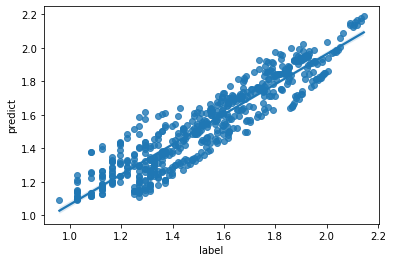

In [ ]:
# fit결과 확인
final_result_lgb = pd.concat([df21_y.reset_index(drop=True), pd.DataFrame(predict_lgb_21)], axis = 1)
final_result_lgb.columns = ['label','predict']

sns.regplot(x = 'label', y = 'predict', data = final_result_lgb)

### 2021년도 중학교 데이터 예측

In [ ]:
# 2021년도 데이터 확인
df21_mi_final.info()
df21_mi_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     600 non-null    object
 1   count   600 non-null    object
 2   rank    600 non-null    object
 3   month   600 non-null    object
 4   year    600 non-null    object
dtypes: object(5)
memory usage: 28.1+ KB


,tag,count,rank,month,year
0,중학교,158,1,1,2021
1,구매,143,2,1,2021
2,학년,139,3,1,2021
3,공고,130,4,1,2021
4,입찰,118,5,1,2021


In [ ]:
df21_mi_final['tag'] = df21_mi_final['tag'].astype('category')
df21_mi_final['count'] = df21_mi_final['count'].astype('float')
df21_mi_final['rank'] = df21_mi_final['rank'].astype('int64')
df21_mi_final['month'] = df21_mi_final['month'].astype('int64')
df21_mi_final['year'] = df21_mi_final['year'].astype('int64')

In [ ]:
df21_mi_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   tag     600 non-null    category
 1   count   600 non-null    float64 
 2   rank    600 non-null    int64   
 3   month   600 non-null    int64   
 4   year    600 non-null    int64   
dtypes: category(1), float64(1), int64(3)
memory usage: 26.8 KB


In [ ]:
df21_mi_final['count_log'] = np.log1p(np.log1p(df21_mi_final['count']))

In [ ]:
df21_y = df21_mi_final[['count_log']]
df21_x = df21_mi_final[['tag','rank','month','year']]

lgb 모델을 통한 2021년도 예측 결과

In [ ]:
# test 데이터 예측 
predict_lgb_21 = LGB_mi.predict(df21_x)

In [ ]:
# 에러 측정
mse_lgb_21 = mean_squared_error(df21_y, predict_lgb_21)
r2 = r2_score(df21_y, predict_lgb_21)

print('Mean squared error: ', mse_lgb_21)
print('R2 score: ', r2)

Mean squared error:  0.007974279637359506
R2 score:  0.8871898524081072


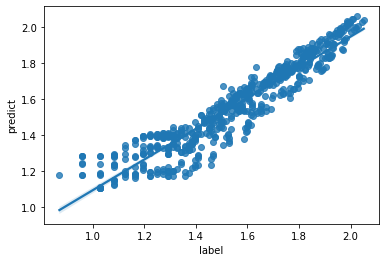

In [ ]:
# fit결과 확인
final_result_lgb = pd.concat([df21_y.reset_index(drop=True), pd.DataFrame(predict_lgb_21)], axis = 1)
final_result_lgb.columns = ['label','predict']

sns.regplot(x = 'label', y = 'predict', data = final_result_lgb)

### 2021년도 고등학교 데이터 예측

In [ ]:
# 2021년도 데이터 확인
df21_hi_final.info()
df21_hi_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     600 non-null    object
 1   count   600 non-null    object
 2   rank    600 non-null    object
 3   month   600 non-null    object
 4   year    600 non-null    object
dtypes: object(5)
memory usage: 28.1+ KB


,tag,count,rank,month,year
0,구매,242,1,1,2021
1,공고,204,2,1,2021
2,고등학교,200,3,1,2021
3,학년,174,4,1,2021
4,학교,128,5,1,2021


In [ ]:
df21_hi_final['tag'] = df21_hi_final['tag'].astype('category')
df21_hi_final['count'] = df21_hi_final['count'].astype('float')
df21_hi_final['rank'] = df21_hi_final['rank'].astype('int64')
df21_hi_final['month'] = df21_hi_final['month'].astype('int64')
df21_hi_final['year'] = df21_hi_final['year'].astype('int64')

In [ ]:
df21_hi_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   tag     600 non-null    category
 1   count   600 non-null    float64 
 2   rank    600 non-null    int64   
 3   month   600 non-null    int64   
 4   year    600 non-null    int64   
dtypes: category(1), float64(1), int64(3)
memory usage: 26.8 KB


In [ ]:
df21_hi_final['count_log'] = np.log1p(np.log1p(df21_hi_final['count']))

In [ ]:
df21_y = df21_hi_final[['count_log']]
df21_x = df21_hi_final[['tag','rank','month','year']]

lgb 모델을 통한 2021년도 예측 결과

In [ ]:
# test 데이터 예측 
predict_lgb_21 = LGB_hi.predict(df21_x)

In [ ]:
# 에러 측정
mse_lgb_21 = mean_squared_error(df21_y, predict_lgb_21)
r2 = r2_score(df21_y, predict_lgb_21)

print('Mean squared error: ', mse_lgb_21)
print('R2 score: ', r2)

Mean squared error:  0.004996038302963703
R2 score:  0.8819782895733236


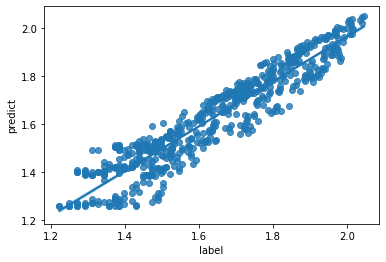

In [ ]:
# fit결과 확인
final_result_lgb = pd.concat([df21_y.reset_index(drop=True), pd.DataFrame(predict_lgb_21)], axis = 1)
final_result_lgb.columns = ['label','predict']

sns.regplot(x = 'label', y = 'predict', data = final_result_lgb)